<a href="https://colab.research.google.com/github/Irvan-Himawan/E29-DTS-PROJECT/blob/master/Analysis_e-commerce_dataset_dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce
- **Nama:** Irvan Alvisa Himawan
- **Email:** Himawan.alvisa@gmail.com
- **ID Dicoding:** himawan21

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```

- Pertanyaan 1 :
Sebutkan 10 Kota terbanyak yang melakukan transaksi dan berhasil terkirim ?
- Pertanyaan 2 :
Dari 10 kota tersesbut Sebutkan masing-masing 3 produk yang paling banyak dibeli?

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from shapely.ops import unary_union

## Data Wrangling

### Gathering Data

In [189]:
geo_df = pd.read_csv("data_set\geolocation_dataset.csv")

geo_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
903335,88015,-27.591384,-48.558214,florianopolis,SC
334106,14300,-20.889367,-47.598091,batatais,SP
944075,90620,-30.047364,-51.200546,porto alegre,RS
786601,71937,-15.839223,-48.014013,brasilia,DF
149547,6083,-23.543294,-46.775724,osasco,SP


In [190]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [132]:
customer_df = pd.read_csv("data_set\customers_dataset.csv")
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
45785,1edfcdc4a172cc6fc9e97a8e42ca5071,1dcd5235c92f74a05c76b538ca7e7d62,50030,recife,PE
35213,1930ebf86fd1bdd9ee6f1dcc6b81773a,6771013326c01004a0dfee208f0915e2,1528,sao paulo,SP
28104,11b404d7080235f5ff52a1c38deb5a98,562dc4d7d8e2434726725aeca74da6e6,22451,rio de janeiro,RJ
88612,b69f71499d18371756e7a6d31a9ac0dc,76a667726ee3009489d90d856bd8361c,64049,teresina,PI
19179,48d52656f1b2e51c6316984afd1f50ac,e7e6adc70176b14f21be09c6346bc853,88828,balneario rincao,SC
22628,271532309e979a92079b633ba44e03f5,1fd6006d97db2e063cb7ca06de81208e,3646,sao paulo,SP
60607,78756227f125559cd869e1de36480a89,c857c97338c7ba7b62ef19a19f0ab62b,94420,viamao,RS
65970,0e2b91772bce3a830fe191d6646d96ce,fc6d83a2169d72e71c796150c2565fe8,11718,praia grande,SP
30233,b9ad551172b8bcf402d348f18d477059,8fe346bf2e4af73b3752f0bb1e8ea203,29901,linhares,ES
47365,aae8a8be7d213183eead54d3fb27b04b,9ea675ae7d2fc65e2c62316827118da0,21221,rio de janeiro,RJ


In [159]:
orders_df = pd.read_csv("data_set\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
orderItems_df = pd.read_csv("data_set\order_items_dataset.csv")
orderItems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11564,1a49eefb9e76ce92c81ef0dde4a431ff,1,1ca737c9f8f06b3672be9f9f3f603d36,e7d5b006eb624f13074497221eb37807,2018-03-25 22:48:22,127.90,18.78
47471,6bea4b3d238b2f7104807ff9f128f7e6,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-11 11:35:27,54.99,21.28
13412,1e7aa16222b1c59810585e0dc2bf73ed,1,bb390f8ba6aad7fa1f1be418d7838beb,d91fb3b7d041e83b64a00a3edfb37e4f,2018-04-11 12:30:13,60.90,26.51
83494,bda0a601b915e77d4f2d40c927fdc931,1,95d9994fadaf3720792cb0f1db17f782,0d85bbda9889ce1f7e63778d24f346eb,2017-08-31 12:45:00,58.90,17.98
21817,31d6ca721a02109e3f90202f01c62a4a,1,19944bc70a13c9b62e18a2bc7e913bb6,0bae85eb84b9fb3bd773911e89288d54,2018-03-15 00:48:50,24.95,19.32


In [37]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [38]:
products_df = pd.read_csv("data_set\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_translate = pd.read_csv("data_set\product_category_name_translation.csv")
products_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [41]:
products_translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Assessing Data

#### Customers Dataset

In [133]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [43]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [44]:
customer_df['customer_unique_id'].duplicated().sum()

3345

#### Orders Dataset

In [45]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [147]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [148]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

#### Order Items Dataset

In [48]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [49]:
orderItems_df['order_id'].duplicated().sum()

13984

In [50]:
orderItems_df.describe(
)

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Geo Location Dataset

In [191]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [192]:
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [53]:
print("Jumlah Product ID yang duplicate = ",products_df['product_id'].duplicated().sum())

Jumlah Product ID yang duplicate =  0


## Cleaning Data

#### Cleaning Order Items Dataset

In [54]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Cleaning Order Dataset

In [156]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [161]:
orders_df.dropna(inplace=True)

dateTime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in dateTime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column], format='ISO8601')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Cleaning Geo Location

In [143]:
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
geometry                       0
buffer                         0
dtype: int64

In [162]:
duplicated_geo = geo_df[geo_df.duplicated()]

duplicated_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,buffer
15,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."
44,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."
65,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."
66,1009,-23.546935,-46.636588,sao paulo,SP,POINT (-5191561.22 -2698296.599),"POLYGON ((-5191061.22 -2698296.599, -5191063.6..."
67,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."


In [193]:
geo_df.drop_duplicates(inplace=True)

geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


#### Cleaning Customer Dataset

In [134]:
sorted_customer_df = customer_df[customer_df.duplicated('customer_unique_id', keep=False)].sort_values('customer_unique_id')

sorted_customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
87012,d95f60d70d9ea9a7fe37c53c931940bb,004b45ec5c64187465168251cd1c9c2f,57035,maceio,AL
36269,8ac44e9c15d396b8c3c7cbab0fff4536,0058f300f57d7b93c477a131a59b36c3,41370,salvador,BA
61403,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731,salvador,BA
87414,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF
54881,876356df457f952458a764348e1858bc,00a39521eb40f7012db50455bf083460,72595,brasilia,DF


In [135]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [138]:
customer_df.drop_duplicates('customer_unique_id', keep='first', inplace=True)

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               96096 non-null  object
 1   customer_unique_id        96096 non-null  object
 2   customer_zip_code_prefix  96096 non-null  int64 
 3   customer_city             96096 non-null  object
 4   customer_state            96096 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.4+ MB


## Exploratory Data Analysis (EDA)

## Delivered Order Dataset

In [59]:
delivered_order = orders_df[orders_df['order_status'] == 'delivered']
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96464 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96464 non-null  object        
 1   customer_id                    96464 non-null  object        
 2   order_status                   96464 non-null  object        
 3   order_purchase_timestamp       96464 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96462 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96464 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [60]:
delivered_order['order_delivered_customer_date'].isna().sum()

8

In [141]:
delivered_order.dropna(subset=['order_delivered_customer_date'], inplace=True)

delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Merge Delivered Order with Customer

In [167]:
merge_delivered_order_cust = pd.merge(delivered_order,
                            customer_df[['customer_id','customer_zip_code_prefix','customer_city','customer_state']],
                            on ='customer_id',
                            how = 'left')
merge_delivered_order_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195.0,santo andre,SP


In [63]:
merge_delivered_order_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
 8   customer_zip_code_prefix       96455 non-null  int64         
 9   customer_city                  96455 non-null  object        
 10  customer_state                 96455 non-null  object        
dtypes: datetime64[n

#### Product Dataset Analysis

In [64]:
merged_products = pd.merge(products_df, products_translate,
                           on='product_category_name',
                           how='left')

merged_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [65]:
merged_products.value_counts('product_category_name_english')

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64

In [168]:
merged_products.dropna()
merged_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


## Merge Order Items with Merged Products

In [169]:
merge_order_items = pd.merge(orderItems_df,
                             merged_products,
                             on ='product_id',
                             how = 'left')
merge_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [170]:
merge_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

### Merge Order, product and customer

In [173]:
merge_order_product_cust = pd.merge(
    merge_delivered_order_cust,
    merge_order_items,
    on='order_id',
    how='left'
)
merge_order_product_cust.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149.0,sao paulo,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813.0,barreiras,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265.0,vianopolis,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296.0,sao goncalo do amarante,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195.0,santo andre,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [172]:
merge_order_product_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   customer_zip_code_prefix       106209 non-null  float64       
 9   customer_city                  106209 non-null  object        
 10  customer_state                 106209 non-null  object        
 11  

In [175]:
merge_order_product_cust.dropna(inplace=True)

merge_order_product_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104707 entries, 0 to 110172
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104707 non-null  object        
 1   customer_id                    104707 non-null  object        
 2   order_status                   104707 non-null  object        
 3   order_purchase_timestamp       104707 non-null  datetime64[ns]
 4   order_approved_at              104707 non-null  datetime64[ns]
 5   order_delivered_carrier_date   104707 non-null  datetime64[ns]
 6   order_delivered_customer_date  104707 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104707 non-null  datetime64[ns]
 8   customer_zip_code_prefix       104707 non-null  float64       
 9   customer_city                  104707 non-null  object        
 10  customer_state                 104707 non-null  object        
 11  order

In [176]:
merge_order_product_cust.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,104707,104707,104707,104707,104707,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000,104707.000000
mean,2018-01-03 15:58:13.513776128,2018-01-04 02:30:03.249028608,2018-01-06 22:35:08.641609472,2018-01-16 03:36:56.684548352,2018-01-27 10:44:53.390127104,35188.503729,1.193722,120.715537,20.018858,48.798915,789.058134,2.216939,2100.526097,30.185976,16.621754,23.026292
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,2017-09-17 18:12:09,2017-09-18 12:30:19,2017-09-20 16:58:41.500000,2017-09-28 20:12:12.500000,2017-10-10 00:00:00,11357.500000,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,2018-01-22 22:24:56,2018-01-23 11:10:29,2018-01-25 23:52:18,2018-02-05 21:48:30,2018-02-19 00:00:00,24358.000000,1.000000,74.990000,16.320000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,2018-05-07 12:02:55,2018-05-07 21:31:15,2018-05-09 13:56:30,2018-05-16 21:10:20,2018-05-29 00:00:00,59075.000000,1.000000,134.900000,21.180000,57.000000,991.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-23 00:00:00,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,NaN,NaN,NaN,NaN,NaN,29883.595919,0.698666,183.494623,15.823455,10.009031,651.884759,1.726144,3749.917671,16.164948,13.468102,11.707521


In [ ]:
geo_df.drop(columns=['geometry','buffer'], inplace=True)


In [187]:
### Create CSV file
merge_order_product_cust.to_csv('dashboard\cleaned_data\merge_order_product_cust.csv', index=False)

In [195]:
geo_df.to_csv('dashboard\cleaned_data\cleaned_geo_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [177]:
merge_order_product_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149.0,sao paulo,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813.0,barreiras,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265.0,vianopolis,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296.0,sao goncalo do amarante,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195.0,santo andre,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


customer_city
sao paulo                16435
rio de janeiro            7173
belo horizonte            2914
brasilia                  2238
curitiba                  1642
campinas                  1550
porto alegre              1462
salvador                  1287
guarulhos                 1223
sao bernardo do campo      980
Name: count, dtype: int64


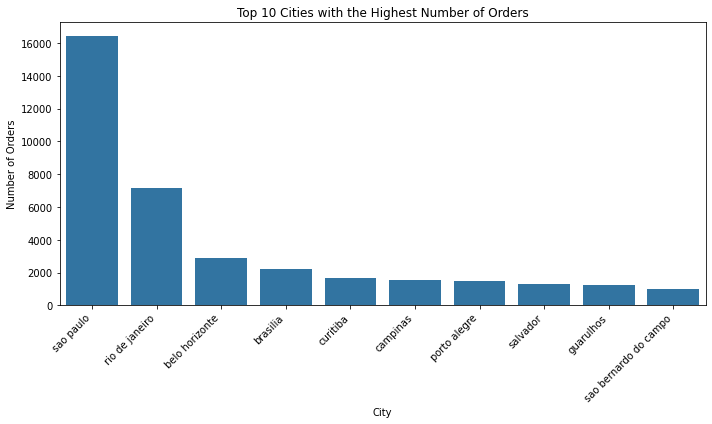

In [178]:
top_ten_cities = merge_order_product_cust['customer_city'].value_counts().nlargest(10)
print(top_ten_cities)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_cities.index, y=top_ten_cities.values)
plt.title('Top 10 Cities with the Highest Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [179]:
# Identify the top 10 cities
top_cities = merge_order_product_cust['customer_city'].value_counts().nlargest(10).index

# Filter the DataFrame to include only rows from the top 10 cities
filtered_df = merge_order_product_cust[merge_order_product_cust['customer_city'].isin(top_cities)]

# Group data by customer city and product category, then count the orders
grouped_data = filtered_df.groupby(['customer_city', 'product_category_name_english'])['order_id'].count().reset_index()
grouped_data.rename(columns={'order_id': 'count'}, inplace=True)

# Future-proofing the groupby apply operation by excluding grouping columns explicitly
result = (
    grouped_data.groupby('customer_city', group_keys=False)
    .apply(lambda x: x.nlargest(3, columns='count'))
    .reset_index(drop=True)
)

# Print the result
print(result)


            customer_city product_category_name_english  count
0          belo horizonte                bed_bath_table    327
1          belo horizonte                 health_beauty    257
2          belo horizonte         computers_accessories    241
3                brasilia                 health_beauty    240
4                brasilia                sports_leisure    208
5                brasilia                bed_bath_table    192
6                campinas                bed_bath_table    158
7                campinas                 health_beauty    143
8                campinas               furniture_decor    122
9                curitiba                sports_leisure    145
10               curitiba               furniture_decor    142
11               curitiba         computers_accessories    136
12              guarulhos                bed_bath_table    129
13              guarulhos                 health_beauty    118
14              guarulhos               furniture_decor

C:\Users\IRVANA~1\AppData\Local\Temp/ipykernel_33716/1999949792.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, columns='count'))


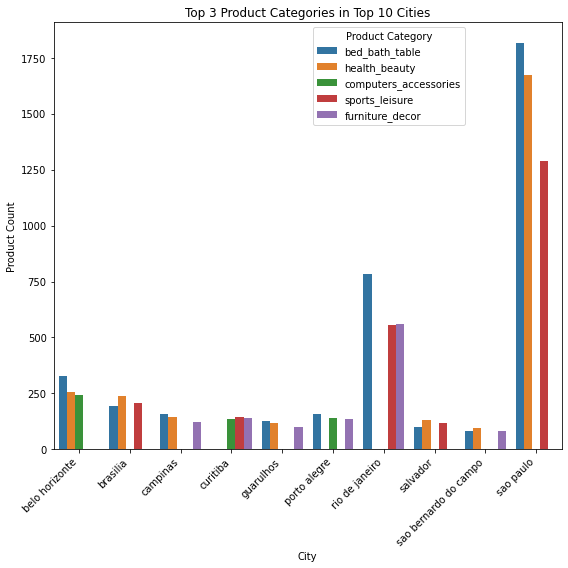

In [180]:
plt.figure(figsize=(8, 8))
sns.barplot(x='customer_city', y='count', hue='product_category_name_english', data=result)
plt.title('Top 3 Product Categories in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

In [194]:
# Step 1: Create a GeoDataFrame from the points
geo_df['geometry'] = [Point(xy) for xy in zip(geo_df['geolocation_lng'], geo_df['geolocation_lat'])]
geo_df = gpd.GeoDataFrame(geo_df, geometry='geometry', crs="EPSG:4326")

# Step 2: Reproject to a projected CRS for accurate buffer calculations
geo_df = geo_df.to_crs(epsg=3857)

# Step 3: Create buffers (e.g., 500 meters around each point)
geo_df['buffer'] = geo_df.geometry.buffer(500)

# Step 4: Group by ZIP code and combine buffers into MultiPolygon
multi_polygons = geo_df.groupby('geolocation_zip_code_prefix')['buffer'].apply(lambda group: unary_union(group))

# Step 5: Create a new GeoDataFrame for the combined MultiPolygons
result_gdf = gpd.GeoDataFrame(
    multi_polygons,
    columns=['geometry'],
    crs=geo_df.crs
).reset_index()

# Step 6: Reproject back to WGS 84 for visualization or mapping
result_gdf = result_gdf.to_crs(epsg=4326)

geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,buffer
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-5191862.242 -2698137.025),"POLYGON ((-5191362.242 -2698137.025, -5191364...."
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-5192477.644 -2698192.864),"POLYGON ((-5191977.644 -2698192.864, -5191980...."
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-5192269.608 -2698198.673),"POLYGON ((-5191769.608 -2698198.673, -5191772...."
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-5191885.314 -2697987.775),"POLYGON ((-5191385.314 -2697987.775, -5191387...."
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-5192119.966 -2697646.055),"POLYGON ((-5191619.966 -2697646.055, -5191622...."


C:\Users\IRVANA~1\AppData\Local\Temp/ipykernel_33716/2926022835.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  result_gdf.plot(ax=plt.gca(), color='orange', alpha=0.5, edgecolor='black', label='Buffers Combined', aspect='equal')
c:\Users\Irvan Alvisa Himawan\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


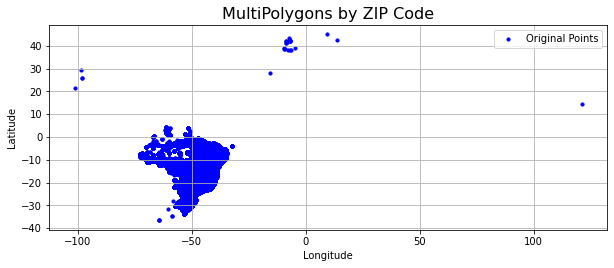

In [77]:
# Plot the original points
plt.figure(figsize=(10, 10))
geo_df.to_crs(epsg=4326).plot(ax=plt.gca(), color='blue', markersize=10, label='Original Points')

# Plot the resulting MultiPolygons
# Change aspect to 'equal' to avoid potential issues with aspect calculation
result_gdf.plot(ax=plt.gca(), color='orange', alpha=0.5, edgecolor='black', label='Buffers Combined', aspect='equal')

# Add title and legend
plt.title("MultiPolygons by ZIP Code", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Conclusion

**- Conclusion pertanyaan 1**
  
  Kota yang paling banyak transaksi yang berhasil terkirim/delivered adalah Sao Paulo dengan total transaksi 17.398. Berdasarkan hasil bar chart yang sudah dibuat, untuk urutan 1-4 memiliki ketimpangan yang cukup jauh, tapi untuk urutan selanjutnya memiliki perbedaan angka yang tidak terlalu jauh.

**- Conclusion pertanyaan 2**
  
  Dari 10 kota yang miliki transaksi yang berhasil terkirin/delivered terbanyak. Terdapat 3 kategori barang yang sering di beli di kota-kota tersebut, yaitu:
  1.   bed_bath_table
  2.   health_beauty
  3.   computers_accesssories


